**OUTLINE**
- Simulation for Parabola of Loss Function
- RMSE
- Confidence Intervals

Before starting, lets load the same Cars24 dataset we can work with

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
!gdown 1XH29crmDjqpE1sPCUCffryF4FDbKVmjS

Downloading...
From: https://drive.google.com/uc?id=1XH29crmDjqpE1sPCUCffryF4FDbKVmjS
To: /content/cars24-car-price-clean.csv
100% 1.71M/1.71M [00:00<00:00, 132MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,make,model,transmission_type,seats_coupe,seats_family,seats_large,fuel_cng,fuel_diesel,fuel_electric,fuel_lpg,fuel_petrol,seller_dealer,seller_individual,seller_trustmark dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,Maruti,Alto Std,1,0,1,0,0,0,0,0,1,0,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,Hyundai,Grand i10 Asta,1,0,1,0,0,0,0,0,1,0,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,Hyundai,i20 Asta,1,0,1,0,0,0,0,0,1,0,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,Maruti,Alto K10 2010-2014 VXI,1,0,1,0,0,0,0,0,1,0,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
# define X and y
X = df["max_power"].values
Y = df["selling_price"].values

In [ ]:
# standardize the data
u = X.mean()
std = X.std()
X = (X-u)/std

### Cost Function Visualisation

#### How does the "cost function" surface look for univariate linear regression?

To understand this, lets take different possible values of W0 and W1

- For a set of W0 and W1 values, we can find MSE - `np.sum((Y-Y_hat)**2)/Y.shape`[0]
- We can plot MSE for possible values of
  - W0=[-100,100],
  - W1=[-100,100]
  - with step-size=1

#### How can we generate different combinations of W0 and W1?

- We will use `np.meshgrid(W0,W1)`
- It will return two matrices
  1. Contains X-coordinate (W0)
  2. Contains Y-coordinate (W1) \
  You can add a print to statement to undersrtand the output of meshgrid



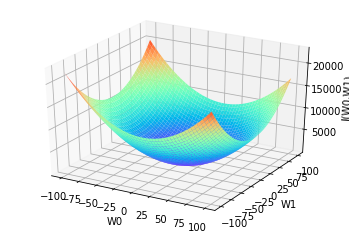

In [ ]:
W0 = np.arange(-100,100,1)
W1 = np.arange(-100,100,1)

W0,W1 = np.meshgrid(W0,W1)
J = np.zeros(W0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_hat = W1[i,j]*X + W0[i,j]
        J[i,j] = np.sum((Y-Y_hat)**2)/Y.shape[0]

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(W0,W1,J, cmap="rainbow")
axes.set_xlabel("W0")
axes.set_ylabel("W1")
axes.set_zlabel("J(W0,W1)")
plt.show()

### Root Mean Square Error (RMSE)


- $ RMSE = \sqrt{∑_{i=1}^{i=n} (y_i - y_{i}^{-}) ÷ n } $
- $y_i$ is the actual value
- $y_{i}^{-}$ is the predicted value
- n is the number of samples
- ANALOGOUS TO -
  - Euclidean Distance: $dist(x,y) = \sqrt{∑_{i=1}^{n}(x_i-y_i)^2}$
 - RMSE can be thought of as some kind of (normalized) distance between the vector of $y_{i}^{-}$ and the vector of $y_i$.




### But how "confident" are we about the estimated line?

We calculate bootstraped estimates to get confidence intervals for our parameters

**Code Recap**

In [ ]:
# model = w0 + x1w1
def predict(x,weight):
    y_hat = weight[0] + weight[1]*x #hypothesis
    return y_hat
#MSE
def error(X,Y,weight):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = predict(X[i],weight)
        total_error += (y_hat - Y[i])**2
    return (total_error/m)

def gradient(X,Y,weight):
    m = X.shape[0]
    # print(m)
    grad = np.zeros((2,)) #initializing gradient from 0
    # print(grad)
    for i in range(200): #iterate over all points
        x = X[i]
        y_hat = predict(x,weight)
        y = Y[i]

        grad[0] += -2*(y - y_hat)
        grad[1] += -2*(y - y_hat)*x
        # print(x, y)
        # print(2*(y - y_hat) , -2*(y - y_hat)*x)
        # print(grad)
    return grad/m

In [ ]:
def gradient_descent(X,Y, epochs=800,learning_rate =0.1):
    weight = np.zeros((2,))
    error_list = []
    weight_list = []

    for i in range(epochs):
        # Compute grad
        grad = gradient(X,Y,weight)
        # print(grad)
        e = error(X,Y,weight)

        #Update weights
        weight[0] = weight[0] - learning_rate*grad[0]
        weight[1] = weight[1] - learning_rate*grad[1]
        # Storing the weight values during updates
        weight_list.append((weight[0],weight[1]))
        error_list.append(e)

    return weight,error_list,weight_list

In [ ]:
weight, error_list, weight_list = gradient_descent(X,Y,epochs=800)

### Lets calculate Confidence Intervals by bootstrapping technique we learnt in P&S module


Recall that we calculated bootstraped estimates to get confidence intervals for our parameters


NOTE: Please do not run this cell below, it will take a lot of time before it shows results.

In [ ]:
n_reps = 1000
bs_weights = []
for i in range(n_reps):
    inds = np.arange(len(X)) #setup an array of indices
    bs_inds = np.random.choice(inds, size=len(inds)) # bootstrap the indices
    X_bs, Y_bs = X[bs_inds], Y[bs_inds] # generate the bootstrapped sample
    bs_weight, _, _ = gradient_descent(X_bs, Y_bs, epochs=50) # perform gradient descent
    bs_weights.append(bs_weight)

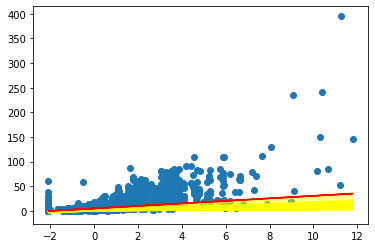

In [ ]:
plt.figure()
Y_hat = predict(X,weight)
plt.scatter(X,Y)
for i in range(n_reps):
    plt.plot(X, predict(X, bs_weights[i]), alpha=0.1, color='yellow')
plt.plot(X,Y_hat,color='red')
plt.show()

#### So, how do I get the estimates if boorstrapping technique takes so much time?

Thanks to Central Limit Theorem, we can calculate it using simple formula.

We will discuss this in one of the future classes soon.


This is a great chance to revise CLT, if in case, you have forgotten.